<a href="https://colab.research.google.com/github/plaban1981/Feature_Selection/blob/master/Advanced_Housing_Data_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Advanced Housing Prices- Feature Engineering
The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data



We will be performing all the below steps in Feature Engineering
1.   Missing values
2.   Temporal variables
3.   Categorical variables: remove rare labels
4.   Standarise the values of the variables to the same range

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkF

## to visualise al the columns in the dataframe

In [0]:
pd.pandas.set_option('display.max_columns',None)

## Load Training Data into Pandas DataFrame

In [9]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Summary Statistics of Training Data

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

## Missing Values

#### First lets handle Categorical features which are missing

In [12]:
features_nan = [ feature for feature in df_train.columns if df_train[feature].isnull().sum() > 1 and df_train[feature].dtype == 'object']
for col in features_nan :
  print(f'Feature {col}  has {np.round(df_train[col].isnull().mean(),4)} % of Missing Values.')

Feature Alley  has 0.9377 % of Missing Values.
Feature MasVnrType  has 0.0055 % of Missing Values.
Feature BsmtQual  has 0.0253 % of Missing Values.
Feature BsmtCond  has 0.0253 % of Missing Values.
Feature BsmtExposure  has 0.026 % of Missing Values.
Feature BsmtFinType1  has 0.0253 % of Missing Values.
Feature BsmtFinType2  has 0.026 % of Missing Values.
Feature FireplaceQu  has 0.4726 % of Missing Values.
Feature GarageType  has 0.0555 % of Missing Values.
Feature GarageFinish  has 0.0555 % of Missing Values.
Feature GarageQual  has 0.0555 % of Missing Values.
Feature GarageCond  has 0.0555 % of Missing Values.
Feature PoolQC  has 0.9952 % of Missing Values.
Feature Fence  has 0.8075 % of Missing Values.
Feature MiscFeature  has 0.963 % of Missing Values.


In [13]:
df_train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

## Replacing categorical values having nan value with 'Missing' word

In [0]:
def replace_cat_feature(dataset,features):
  data = dataset.copy()
  data[features] = data[features].fillna('Missing')
  return data

In [0]:
df_train = replace_cat_feature(df_train,features_nan)

In [16]:
df_train[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [17]:
df_train['Alley'].unique()

array(['Missing', 'Grvl', 'Pave'], dtype=object)

In [18]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


## Check for numerical variables the contains missing values

In [19]:
numerical_features_nan = [ feature for feature in df_train.columns if df_train[feature].isnull().sum() > 1 and df_train[feature].dtype != 'object']
for col in numerical_features_nan :
  print(f'Feature {col}  has {np.round(df_train[col].isnull().mean(),4)} % of Missing Values.')

Feature LotFrontage  has 0.1774 % of Missing Values.
Feature MasVnrArea  has 0.0055 % of Missing Values.
Feature GarageYrBlt  has 0.0555 % of Missing Values.


In [0]:
df_train[df_train['LotFrontage'].isnull()].head()

## Replacing Numerical Features having nan values with median and engineering a new feature to keep track of which column value had null by marking it as 1.

In [0]:
for col in numerical_features_nan:
  col_name = col + '_nan'
  #create a new feature to capture which column values had nan
  df_train[col_name] = np.where(df_train[col].isnull(),1,0)
  #
  df_train[col].fillna(df_train[col].median(),inplace=True)
 
 

In [21]:
df_train[numerical_features_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [22]:
df_train[df_train['LotFrontage'].isnull()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan


## Replace NaN values for which a fill has been made with median value has been captured via a new feature **LotFrontage_nan**

In [23]:
df_train[df_train['LotFrontage_nan'] == 1].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
12,13,20,RL,69.0,12968,Pave,Missing,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,Missing,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,Missing,Missing,Missing,0,9,2008,WD,Normal,144000,1,0,0
14,15,20,RL,69.0,10920,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,Missing,GdWo,Missing,0,5,2008,WD,Normal,157000,1,0,0
16,17,20,RL,69.0,11241,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,Missing,Missing,Shed,700,3,2010,WD,Normal,149000,1,0,0
24,25,20,RL,69.0,8246,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,Missing,MnPrv,Missing,0,5,2010,WD,Normal,154000,1,0,0


In [24]:
df_train['LotFrontage'].median()

69.0

The NAN value for Numerical feature LotFrontage has been replaced with median value of the Feature i.e. 69.0

In [25]:
df_train['MasVnrArea'].median()

0.0

In [26]:
df_train[df_train['MasVnrArea_nan'] == 1].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
234,235,60,RL,69.0,7851,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal,216500,1,1,0
529,530,20,RL,69.0,32668,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,Missing,0.0,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,Missing,Missing,Missing,0,3,2007,WD,Alloca,200624,1,1,0
650,651,60,FV,65.0,8125,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,Missing,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,Missing,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,5,2008,WD,Normal,205950,0,1,0
936,937,20,RL,67.0,10083,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,Missing,Missing,Missing,0,8,2009,WD,Normal,184900,0,1,0
973,974,20,FV,95.0,11639,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,Missing,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,Missing,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,Missing,Missing,Missing,0,12,2008,New,Partial,182000,0,1,0


## Temporal Variables 

In [0]:
temporal_feature = [col for col in df_train.columns if 'Yr' in col or 'Year' in col]

In [28]:
temporal_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBlt_nan']

In [0]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  df_train[feature]=df_train['YrSold']-df_train[feature]

In [30]:
df_train[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [31]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


##Applying the same feature engineering steps to test data

In [0]:
#from google.colab import files
#files.upload()

In [163]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Check For Missing Categorical Values in test data

In [164]:
test_cat_features = [col for col in df_test.columns if df_test[col].isnull().sum() > 1 and df_test[col].dtypes == 'O']
for col in test_cat_features :
  print(f'Feature {col}  has {np.round(df_test[col].isnull().mean(),4)} % of Missing Values.')

Feature MSZoning  has 0.0027 % of Missing Values.
Feature Alley  has 0.9267 % of Missing Values.
Feature Utilities  has 0.0014 % of Missing Values.
Feature MasVnrType  has 0.011 % of Missing Values.
Feature BsmtQual  has 0.0302 % of Missing Values.
Feature BsmtCond  has 0.0308 % of Missing Values.
Feature BsmtExposure  has 0.0302 % of Missing Values.
Feature BsmtFinType1  has 0.0288 % of Missing Values.
Feature BsmtFinType2  has 0.0288 % of Missing Values.
Feature Functional  has 0.0014 % of Missing Values.
Feature FireplaceQu  has 0.5003 % of Missing Values.
Feature GarageType  has 0.0521 % of Missing Values.
Feature GarageFinish  has 0.0535 % of Missing Values.
Feature GarageQual  has 0.0535 % of Missing Values.
Feature GarageCond  has 0.0535 % of Missing Values.
Feature PoolQC  has 0.9979 % of Missing Values.
Feature Fence  has 0.8012 % of Missing Values.
Feature MiscFeature  has 0.965 % of Missing Values.


In [165]:
df_test['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

## Replace Missing Values with 'Missing'

In [0]:
df_test= replace_cat_feature(df_test,test_cat_features)

In [135]:
df_test['Alley'].unique()

array(['Missing', 'Pave', 'Grvl'], dtype=object)

## Check for Missing values in Numerical features in test data

In [167]:
test_numeric_feat_nan = [col for col in df_test.columns if df_test[col].isnull().sum() > 1 and df_test[col].dtypes != 'O']
for col in test_numeric_feat_nan :
  print(f'Feature {col}  has {np.round(df_test[col].isnull().mean(),4)} % of Missing Values.')

Feature LotFrontage  has 0.1556 % of Missing Values.
Feature MasVnrArea  has 0.0103 % of Missing Values.
Feature BsmtFullBath  has 0.0014 % of Missing Values.
Feature BsmtHalfBath  has 0.0014 % of Missing Values.
Feature GarageYrBlt  has 0.0535 % of Missing Values.


In [168]:
df_test[df_test['LotFrontage'].isnull()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
6,1467,20,RL,NaN,7980,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,Missing,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,Missing,GdPrv,Shed,500,3,2010,WD,Normal
40,1501,160,FV,NaN,2980,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,1159.0,Gd,TA,PConc,Gd,TA,No,GLQ,466.0,Unf,0.0,290.0,756.0,GasA,Ex,Y,SBrkr,756,756,0,1512,1.0,0.0,2,1,2,1,Gd,5,Typ,0,Missing,Detchd,2000.0,Unf,2.0,440.0,TA,TA,Y,0,32,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal
41,1502,160,FV,NaN,2403,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,244.0,Unf,0.0,286.0,530.0,GasA,Ex,Y,SBrkr,530,550,0,1080,0.0,0.0,2,1,2,1,Gd,4,Typ,0,Missing,Attchd,2003.0,RFn,2.0,496.0,TA,TA,Y,0,50,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
45,1506,20,RL,NaN,10456,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1967,1967,Hip,CompShg,HdBoard,HdBoard,BrkFace,120.0,TA,TA,CBlock,TA,TA,No,GLQ,506.0,Unf,0.0,1323.0,1829.0,GasA,Gd,Y,SBrkr,1829,0,0,1829,1.0,0.0,2,0,4,1,TA,8,Typ,0,Missing,Attchd,1967.0,RFn,2.0,535.0,TA,TA,Y,0,76,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal
47,1508,50,RL,NaN,18837,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1.5Fin,6,5,1978,1978,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Mn,ALQ,687.0,LwQ,46.0,491.0,1224.0,GasA,TA,Y,SBrkr,1287,604,0,1891,0.0,1.0,3,0,3,1,TA,7,Typ,1,TA,Attchd,1978.0,RFn,2.0,678.0,TA,TA,Y,0,69,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal


In [106]:
df_test['LotFrontage'].median()

67.0

##Replace NaN values in test data  with median valueand capture the nan values for which a fill has been made  via a new feature

In [0]:
for col in test_numeric_feat_nan :
  col_name = col + "_nan"
  df_test[col_name] = np.where(df_test[col].isnull(),1,0)
  df_test[col].fillna(df_test[col].median(),inplace=True)

In [170]:
df_test[df_test['LotFrontage_nan'] == 1].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan
6,1467,20,RL,67.0,7980,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,Missing,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,Missing,GdPrv,Shed,500,3,2010,WD,Normal,1,0,0,0,0
40,1501,160,FV,67.0,2980,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,1159.0,Gd,TA,PConc,Gd,TA,No,GLQ,466.0,Unf,0.0,290.0,756.0,GasA,Ex,Y,SBrkr,756,756,0,1512,1.0,0.0,2,1,2,1,Gd,5,Typ,0,Missing,Detchd,2000.0,Unf,2.0,440.0,TA,TA,Y,0,32,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal,1,0,0,0,0
41,1502,160,FV,67.0,2403,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,244.0,Unf,0.0,286.0,530.0,GasA,Ex,Y,SBrkr,530,550,0,1080,0.0,0.0,2,1,2,1,Gd,4,Typ,0,Missing,Attchd,2003.0,RFn,2.0,496.0,TA,TA,Y,0,50,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,1,0,0,0,0
45,1506,20,RL,67.0,10456,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1967,1967,Hip,CompShg,HdBoard,HdBoard,BrkFace,120.0,TA,TA,CBlock,TA,TA,No,GLQ,506.0,Unf,0.0,1323.0,1829.0,GasA,Gd,Y,SBrkr,1829,0,0,1829,1.0,0.0,2,0,4,1,TA,8,Typ,0,Missing,Attchd,1967.0,RFn,2.0,535.0,TA,TA,Y,0,76,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal,1,0,0,0,0
47,1508,50,RL,67.0,18837,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1.5Fin,6,5,1978,1978,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Mn,ALQ,687.0,LwQ,46.0,491.0,1224.0,GasA,TA,Y,SBrkr,1287,604,0,1891,0.0,1.0,3,0,3,1,TA,7,Typ,1,TA,Attchd,1978.0,RFn,2.0,678.0,TA,TA,Y,0,69,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal,1,0,0,0,0


## Temporal Features in test data

In [171]:
test_temporal_feature = [col for col in df_test.columns if 'Yr' in col or 'Year' in col]
test_temporal_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBlt_nan']

In [0]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  df_test[feature]=df_test['YrSold']-df_test[feature]

In [173]:
df_test[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [174]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0


## Feature Engineering Part 2

#### Handling Numerical Variables 

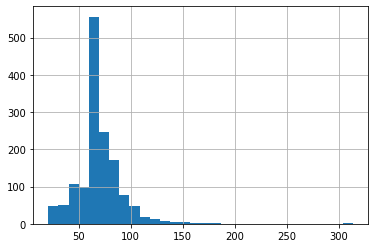

In [57]:
df_train['LotFrontage'].hist(bins=30)

Since the numerical variables are skewed we will perform log normal distribution

In [58]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [0]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_features:
    df_train[feature]=np.log(df_train[feature])

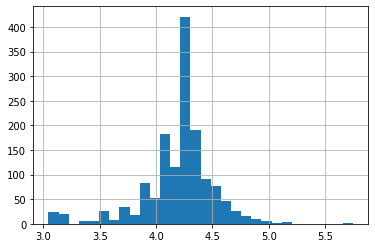

In [62]:
df_train['LotFrontage'].hist(bins=30)

## Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

Rare Categorical features are the features which have less than 1 % of the total observations  ,and those feature values itself can be considered as a separated category

In [0]:
categorical_features=[feature for feature in df_train.columns if df_train[feature].dtype=='O']

In [64]:
print(categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Creating a new category or label for rare categorical values

In [0]:
for col in categorical_features:
  temp = df_train.groupby(col)['SalePrice'].count()/len(df_train)
  temp_df = temp[temp > 0.01].index # column values 
  df_train[col] = np.where(df_train[col].isin(temp_df),df_train[col],'Rare_cat')

In [70]:
df_train[df_train['MSZoning'] == 'Rare_cat'].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
30,31,70,Rare_cat,3.912023,9.047821,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Rare_cat,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,6.475433,668,0,7.183112,0,0,1,0,3,1,TA,6,Typ,0,Missing,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,Missing,MnPrv,Missing,0,7,2008,WD,Normal,10.596635,0,0,0
88,89,50,Rare_cat,4.653960,9.044286,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Rare_cat,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Rare_cat,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,6.920672,0,513,7.330405,0,0,1,0,2,1,Fa,6,Typ,0,Missing,Missing,1980.0,Missing,0,0,Missing,Missing,N,0,0,156,0,0,0,Missing,MnPrv,Missing,0,10,2009,Rare_cat,Abnorml,11.350407,0,0,1
93,94,190,Rare_cat,4.094345,8.881836,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,Rare_cat,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046,Unf,0,168,1214,GasW,Ex,N,SBrkr,7.138867,1031,0,7.736744,0,1,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2,506,TA,TA,Y,0,0,0,0,99,0,Missing,Missing,Missing,0,11,2007,WD,Normal,11.804849,0,0,0
495,496,30,Rare_cat,4.094345,8.971956,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,6.579251,0,0,6.579251,0,0,1,0,2,1,TA,4,Typ,0,Missing,Missing,1980.0,Missing,0,0,Missing,Missing,N,0,523,115,0,0,0,Missing,GdWo,Missing,0,11,2009,WD,Abnorml,10.460242,0,0,1
557,558,50,Rare_cat,4.094345,9.309280,Pave,Missing,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,6,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,637,Unf,0,0,637,GasA,Gd,Y,SBrkr,6.799056,439,0,7.197435,0,0,1,1,3,1,TA,7,Typ,0,Missing,Rare_cat,1994.0,Unf,1,570,TA,TA,Y,0,47,120,0,0,0,Missing,Missing,Missing,0,9,2006,COD,Normal,11.589887,0,0,0


In [0]:
for feature in categorical_features:
    labels_ordered=df_train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df_train[feature]=df_train[feature].map(labels_ordered)

In [75]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,2003,2003,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,2003.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,1976,1976,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,1976.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,2001,2002,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,2001.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,1915,1970,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,1998.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,2000,2000,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,2000.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0


##Feature Scaling

In [79]:
feature_scale = [ col for col in df_train.columns if col not in ['Id','SalePrice']]
print(feature_scale) 

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [0]:
from sklearn.preprocessing import MinMaxScaler ## MinMAxScaler was used as it gave better response compared to StandardScaler
scaler = MinMaxScaler()
feature_scaled = scaler.fit_transform(df_train[feature_scale])

In [82]:
feature_scaled

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [83]:
df_scaled = pd.DataFrame(feature_scaled,columns=feature_scale)
df_scaled.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.949275,0.883333,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.936364,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.753623,0.433333,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.690909,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.934783,0.866667,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.918182,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.311594,0.333333,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.890909,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.927536,0.833333,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.909091,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


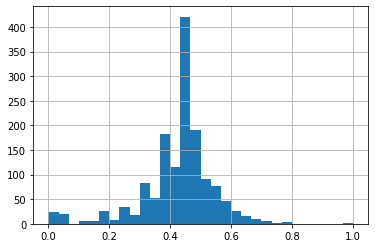

In [84]:
df_scaled['LotFrontage'].hist(bins=30)

## Prepare The New Training Data

In [0]:
training = pd.concat([df_train[['Id','SalePrice']],df_scaled],axis=1)

In [87]:
training.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.949275,0.883333,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.936364,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.753623,0.433333,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.690909,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.934783,0.866667,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.918182,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.311594,0.333333,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.890909,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.927536,0.833333,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.909091,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


## Save the preprocessed training data to a csv file

In [0]:
training.to_csv('Training.csv',index=False)

## Handling Numerical Values for Test data

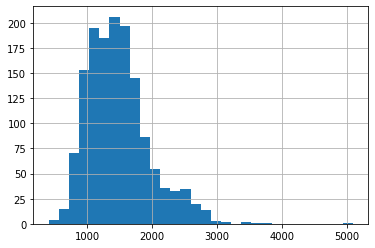

In [144]:
df_test['GrLivArea'].hist(bins=30)

## Converting Skewed data into Normally distributed data using Log Transformation

In [0]:
test_num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
for feature in test_num_features:
    df_test[feature]=np.log(df_test[feature])

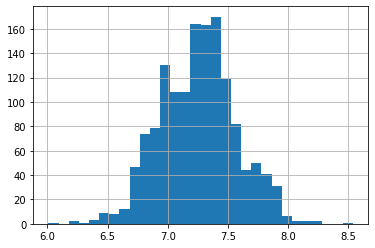

In [176]:
df_test['GrLivArea'].hist(bins=30)

## Handling Rare Categories in Test Data

In [0]:
test_categorical_features=[feature for feature in df_test.columns if df_test[feature].dtype=='O']

In [178]:
print(test_categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [179]:
df_test['MSZoning'].unique().tolist()

['RH', 'RL', 'RM', 'FV', 'C (all)', 'Missing']

In [181]:
(df_test['MSZoning'].value_counts()/len(df_test)).tolist()

[0.7635366689513365,
 0.1658670322138451,
 0.05071967100753941,
 0.01028101439342015,
 0.006854009595613434,
 0.0027416038382453737]

In [0]:
t = pd.DataFrame({'Label':df_test['MSZoning'].unique().tolist(),'counts':(df_test['MSZoning'].value_counts()/len(df_test)).tolist()})

In [184]:
t[t['counts'] > 0.01]

,Label,counts
0,RH,0.763537
1,RL,0.165867
2,RM,0.050720
3,FV,0.010281


In [190]:
t[t['counts'] > 0.01]['Label'].tolist()

['RH', 'RL', 'RM', 'FV']

In [189]:
np.where(df_test['MSZoning'].isin(t[t['counts'] > 0.01]['Label'].tolist()),df_test['MSZoning'],'Rare_cat')

array(['RH', 'RL', 'RL', ..., 'RL', 'RL', 'RL'], dtype=object)

##Creating a new category or label for rare categorical values in test data

In [0]:
df_test= replace_cat_feature(df_test,test_categorical_features)

In [0]:
for col in test_categorical_features:
  labels = df_test[col].unique().tolist()
  tmp_count = (df_test[col].value_counts()/len(df_test)).tolist()
  t = pd.DataFrame({'Label':labels,'counts':tmp_count})
  vals = t[t['counts'] > 0.01]['Label'].tolist()
  df_test[col] = np.where(df_test[col].isin(vals),df_test[col],'Rare_cat')

In [194]:
df_test[df_test['MSZoning'] == 'Rare_cat'].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan
98,1559,70,Rare_cat,4.204693,8.771680,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2Story,4,1,103,60,Rare_cat,CompShg,Wd Sdng,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,73.0,Unf,0.0,634.0,707.0,Rare_cat,TA,N,SBrkr,6.848005,942,0,7.541152,0.0,0.0,1,1,4,1,TA,7,Typ,0,Missing,Missing,31.0,Missing,0.0,0.0,Missing,Missing,N,0,0,239,0,0,0,Missing,Missing,Missing,0,3,2010,WD,Abnorml,1,0,0,0,1
142,1603,30,Rare_cat,4.189655,9.072457,Rare_cat,Missing,Reg,Lvl,AllPub,Corner,Gtl,Rare_cat,Norm,Norm,1Fam,1Story,4,7,114,60,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,756.0,756.0,GasA,Gd,Y,SBrkr,6.858565,0,0,6.858565,0.0,0.0,1,0,3,1,TA,5,Typ,0,Missing,Detchd,114.0,RFn,1.0,330.0,TA,TA,N,0,0,265,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Rare_cat,0,0,0,0,0
359,1820,30,Rare_cat,4.204693,8.101678,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,3,99,59,Gable,CompShg,Rare_cat,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,624.0,624.0,GasA,Ex,Y,SBrkr,6.704414,0,0,6.704414,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Missing,30.0,Missing,0.0,0.0,Missing,Missing,N,0,33,0,0,0,0,Missing,Missing,Missing,0,6,2009,WD,Normal,1,0,0,0,1
362,1823,30,Rare_cat,4.276666,9.147614,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,Rare_cat,Norm,Norm,1Fam,1Story,3,3,109,59,Rare_cat,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,245.0,245.0,GasA,TA,N,SBrkr,6.680855,0,0,6.680855,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Missing,30.0,Missing,0.0,0.0,Missing,Missing,N,0,36,94,0,0,0,Missing,Missing,Missing,0,9,2009,WD,Abnorml,0,0,0,0,1
453,1914,30,Rare_cat,4.094345,9.230143,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Rare_cat,Norm,Norm,1Fam,1Story,4,6,84,59,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,572.0,572.0,GasA,Fa,N,Rare_cat,6.349139,0,0,6.349139,0.0,0.0,1,0,2,1,TA,4,Typ,0,Missing,Detchd,69.0,Unf,1.0,200.0,TA,TA,N,0,0,72,0,0,0,Missing,Missing,Missing,0,5,2009,WD,Normal,0,0,0,0,0


In [195]:
df_test['MSZoning'].value_counts()

RL          1114
RM           242
FV            74
Rare_cat      19
RH            10
Name: MSZoning, dtype: int64

In [196]:
df_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan
1454,2915,160,RM,3.044522,7.568379,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Rare_cat,Norm,Norm,Twnhs,2Story,4,7,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,TA,5,Typ,0,Missing,Missing,27.0,Missing,0.0,0.0,Missing,Missing,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,6,2006,WD,Normal,0,0,0,0,1
1455,2916,160,RM,3.044522,7.546446,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Rare_cat,Norm,Norm,TwnhsE,2Story,4,5,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,TA,6,Typ,0,Missing,Rare_cat,36.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,Missing,Missing,Missing,0,4,2006,WD,Abnorml,0,0,0,0,0
1456,2917,20,RL,5.075174,9.903488,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Rare_cat,Norm,Norm,1Fam,1Story,5,7,46,10,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,7.109879,0,0,7.109879,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,46.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,Missing,Missing,Missing,0,9,2006,WD,Abnorml,0,0,0,0,0
1457,2918,85,RL,4.127134,9.253496,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Rare_cat,Norm,Norm,1Fam,SFoyer,5,5,14,14,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,6.877296,0,0,6.877296,0.0,1.0,1,0,3,1,TA,6,Typ,0,Missing,Missing,27.0,Missing,0.0,0.0,Missing,Missing,Y,80,32,0,0,0,0,Missing,MnPrv,Rare_cat,700,7,2006,WD,Normal,0,0,0,0,1
1458,2919,60,RL,4.304065,9.172327,Pave,Missing,Reg,Lvl,AllPub,Inside,Mod,Rare_cat,Norm,Norm,1Fam,2Story,7,5,13,12,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,6.903747,1004,0,7.600902,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,13.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,Missing,Missing,Missing,0,11,2006,WD,Normal,0,0,0,0,0


In [0]:
l_ordered = df_test['MSZoning'].value_counts().sort_values().index

In [200]:
{k:i for i,k in enumerate(l_ordered,0)}# assign 0 to the label with least value count and so on in ascending order

{'FV': 2, 'RH': 0, 'RL': 4, 'RM': 3, 'Rare_cat': 1}

## Label Encoding on the basis of the value count for each label value in test_data

In [0]:
for col in test_categorical_features:
  labels_ordered=df_test[col].value_counts().sort_values().index
  labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
  df_test[col]=df_test[col].map(labels_ordered)

In [202]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan
0,1461,20,0,4.382027,9.360655,1,2,3,3,1,4,2,16,4,1,4,5,5,6,49,49,2,1,10,11,4,0.0,3,3,3,4,4,4,3,468.0,3,144.0,270.0,882.0,1,3,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,4,5,4,0,5,6,49.0,3,1.0,730.0,3,3,2,140,0,0,0,120,0,1,3,2,0,6,2010,4,4,0,0,0,0,0
1,1462,20,4,4.394449,9.565704,1,2,2,3,1,3,2,16,5,1,4,5,6,6,52,52,1,1,7,8,3,108.0,3,3,3,4,4,4,4,923.0,6,0.0,406.0,1329.0,1,3,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,3,6,4,0,5,6,52.0,3,1.0,312.0,3,3,2,393,36,0,0,0,0,1,4,0,12500,6,2010,4,4,0,0,0,0,0
2,1463,60,4,4.304065,9.534595,1,2,2,3,1,4,2,11,5,1,4,4,5,5,13,12,2,1,10,11,4,0.0,3,3,4,3,4,4,6,791.0,6,0.0,137.0,928.0,1,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,4,6,4,1,3,6,13.0,1,2.0,482.0,3,3,2,212,34,0,0,0,0,1,3,2,0,3,2010,4,4,0,0,0,0,0
3,1464,60,4,4.356709,9.208138,1,2,2,3,1,4,2,11,5,1,4,4,6,6,12,12,2,1,10,11,3,20.0,3,3,4,4,4,4,6,602.0,6,0.0,324.0,926.0,1,4,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,3,7,4,1,4,6,12.0,1,2.0,470.0,3,3,2,360,36,0,0,0,0,1,4,2,0,6,2010,4,4,0,0,0,0,0
4,1465,120,4,3.761200,8.518193,1,2,2,2,1,4,2,5,5,1,3,5,8,5,18,18,2,1,8,9,4,0.0,2,3,4,3,4,4,4,263.0,6,0.0,1017.0,1280.0,1,4,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,3,5,4,0,5,6,18.0,2,2.0,506.0,3,3,2,0,82,0,0,144,0,1,4,2,0,1,2010,4,4,0,0,0,0,0


## Feature Scaling in Test Data

In [203]:
test_feature_scale = [col for col in df_test.columns if col != 'Id']
print(test_feature_scale)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [0]:
scaler = MinMaxScaler()
test_feature_scaled = scaler.fit_transform(df_test[test_feature_scale])

In [205]:
test_feature_scaled

array([[0.        , 0.        , 0.59344538, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.59895721, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 1.        , 0.55885415, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.90099208, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 1.        , 0.48035069, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 1.        , 0.55885415, ..., 0.        , 0.        ,
        0.        ]])

In [206]:
df_test_scaled = pd.DataFrame(test_feature_scaled,columns=test_feature_scale)
df_test_scaled.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan
0,0.000000,0.0,0.593445,0.566360,1.0,1.0,1.000000,1.000000,1.0,1.00,1.0,0.941176,0.8,1.0,1.00,1.0,0.444444,0.625,0.384615,0.822581,1.0,1.0,1.0,1.000000,1.00,0.000000,1.000000,1.0,0.75,1.00,1.0,1.0,0.500000,0.116708,0.5,0.094364,0.126168,0.173111,1.0,0.75,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.00,0.166667,1.0,0.00,1.0,1.0,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.75,1.0,0.000000,0.454545,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,1.0,0.598957,0.622527,1.0,1.0,0.666667,1.000000,1.0,0.75,1.0,0.941176,1.0,1.0,1.00,1.0,0.555556,0.625,0.407692,0.870968,0.5,1.0,0.7,0.727273,0.75,0.083721,1.000000,1.0,0.75,1.00,1.0,1.0,0.666667,0.230175,1.0,0.000000,0.189720,0.260844,1.0,0.75,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.75,0.250000,1.0,0.00,1.0,1.0,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,1.00,0.0,0.735294,0.454545,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,1.0,0.558854,0.614005,1.0,1.0,0.666667,1.000000,1.0,1.00,1.0,0.647059,1.0,1.0,1.00,0.8,0.444444,0.500,0.107692,0.225806,1.0,1.0,1.0,1.000000,1.00,0.000000,1.000000,1.0,1.00,0.75,1.0,1.0,1.000000,0.197257,1.0,0.000000,0.064019,0.182139,1.0,0.50,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.00,0.250000,1.0,0.25,0.6,1.0,0.678344,0.333333,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.75,1.0,0.000000,0.181818,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.235294,1.0,0.582212,0.524583,1.0,1.0,0.666667,1.000000,1.0,1.00,1.0,0.647059,1.0,1.0,1.00,0.8,0.555556,0.625,0.100000,0.225806,1.0,1.0,1.0,1.000000,0.75,0.015504,1.000000,1.0,1.00,1.00,1.0,1.0,1.000000,0.150125,1.0,0.000000,0.151402,0.181747,1.0,1.00,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.75,0.333333,1.0,0.25,0.8,1.0,0.675159,0.333333,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,1.00,1.0,0.000000,0.454545,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.588235,1.0,0.317987,0.335596,1.0,1.0,0.666667,0.666667,1.0,1.00,1.0,0.294118,1.0,1.0,0.75,1.0,0.777778,0.500,0.146154,0.322581,1.0,1.0,0.8,0.818182,1.00,0.000000,0.666667,1.0,1.00,0.75,1.0,1.0,0.666667,0.065586,1.0,0.000000,0.475234,0.251227,1.0,1.00,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.75,0.166667,1.0,0.00,1.0,1.0,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,1.00,1.0,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## Final Preprocessed testing data

In [207]:
testing = pd.concat([df_test['Id'],df_test_scaled],axis=1)
testing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan
0,1461,0.000000,0.0,0.593445,0.566360,1.0,1.0,1.000000,1.000000,1.0,1.00,1.0,0.941176,0.8,1.0,1.00,1.0,0.444444,0.625,0.384615,0.822581,1.0,1.0,1.0,1.000000,1.00,0.000000,1.000000,1.0,0.75,1.00,1.0,1.0,0.500000,0.116708,0.5,0.094364,0.126168,0.173111,1.0,0.75,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.00,0.166667,1.0,0.00,1.0,1.0,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.75,1.0,0.000000,0.454545,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1462,0.000000,1.0,0.598957,0.622527,1.0,1.0,0.666667,1.000000,1.0,0.75,1.0,0.941176,1.0,1.0,1.00,1.0,0.555556,0.625,0.407692,0.870968,0.5,1.0,0.7,0.727273,0.75,0.083721,1.000000,1.0,0.75,1.00,1.0,1.0,0.666667,0.230175,1.0,0.000000,0.189720,0.260844,1.0,0.75,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.75,0.250000,1.0,0.00,1.0,1.0,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,1.00,0.0,0.735294,0.454545,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1463,0.235294,1.0,0.558854,0.614005,1.0,1.0,0.666667,1.000000,1.0,1.00,1.0,0.647059,1.0,1.0,1.00,0.8,0.444444,0.500,0.107692,0.225806,1.0,1.0,1.0,1.000000,1.00,0.000000,1.000000,1.0,1.00,0.75,1.0,1.0,1.000000,0.197257,1.0,0.000000,0.064019,0.182139,1.0,0.50,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.00,0.250000,1.0,0.25,0.6,1.0,0.678344,0.333333,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.75,1.0,0.000000,0.181818,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1464,0.235294,1.0,0.582212,0.524583,1.0,1.0,0.666667,1.000000,1.0,1.00,1.0,0.647059,1.0,1.0,1.00,0.8,0.555556,0.625,0.100000,0.225806,1.0,1.0,1.0,1.000000,0.75,0.015504,1.000000,1.0,1.00,1.00,1.0,1.0,1.000000,0.150125,1.0,0.000000,0.151402,0.181747,1.0,1.00,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.75,0.333333,1.0,0.25,0.8,1.0,0.675159,0.333333,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,1.00,1.0,0.000000,0.454545,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1465,0.588235,1.0,0.317987,0.335596,1.0,1.0,0.666667,0.666667,1.0,1.00,1.0,0.294118,1.0,1.0,0.75,1.0,0.777778,0.500,0.146154,0.322581,1.0,1.0,0.8,0.818182,1.00,0.000000,0.666667,1.0,1.00,0.75,1.0,1.0,0.666667,0.065586,1.0,0.000000,0.475234,0.251227,1.0,1.00,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.75,0.166667,1.0,0.00,1.0,1.0,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,1.00,1.0,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


##Convert the testing dataframe into .csv format

In [0]:
testing.to_csv('testing.csv',index=False)